In [1]:
!pip install pyswarms

     ------------------------------------ 104.1/104.1 kB 545.6 kB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
     -------------------------------------- 840.9/840.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.6/7.6 MB 899.3 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.7-cp310-cp310-win_amd64.whl (162 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Using legacy 'setup.py install' for future, since package 'wheel' is not installed.
  Running setup.py install for future: started
  Running setup.py install for future: finished with status 'done'



[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


2023-02-16 14:34:36,715 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████|100/100, best_cost=4.58e-9
2023-02-16 14:34:36,936 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.58296750878073e-09, best pos: [ 4.16237165e-06 -6.75695358e-05]


Minimum cost: 0.0000
Best position: [ 4.16237165e-06 -6.75695358e-05]


<Axes: title={'center': 'Cost History'}, xlabel='Iterations', ylabel='Cost'>

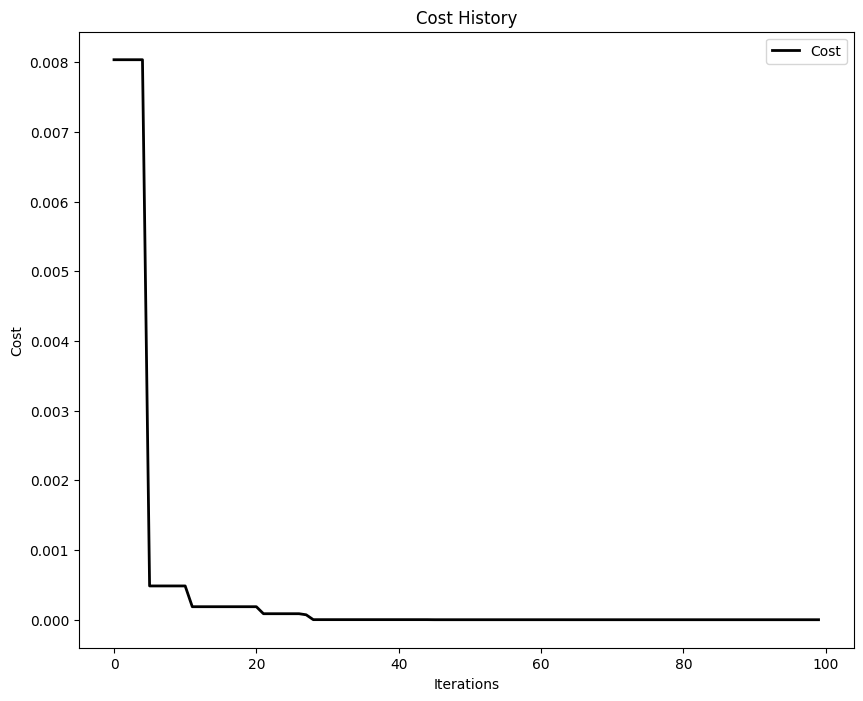

In [2]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface

# Set-up the problem
dim = 2 # dimensions of the problem
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Define the objective function to be minimized (you can choose any of the benchmark functions)
def sphere(x):
    return fx.sphere(x)

# Initialize the swarm
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=dim, options=options)

# Run the optimization
cost, pos = optimizer.optimize(sphere, iters=100)

# Print the results
print('Minimum cost: {:.4f}'.format(cost))
print('Best position: {}'.format(pos))

# Plot the cost history
plot_cost_history(optimizer.cost_history)


# PSO from scratch

In [3]:
import random
import numpy as np

# Define the benchmark function to be minimized (you can choose any of the benchmark functions)
def sphere(x):
    return sum([i**2 for i in x])

# Define the PSO algorithm
def pso(n_particles, dim, n_iterations, c1, c2, w, xmin, xmax):
    # Initialize the swarm
    swarm = np.zeros((n_particles, dim))
    for i in range(n_particles):
        swarm[i] = np.array([random.uniform(xmin, xmax) for d in range(dim)])

    # Initialize the velocities
    velocity = np.zeros((n_particles, dim))

    # Initialize the personal best positions and costs
    pbest_positions = swarm
    pbest_costs = [float('inf') for i in range(n_particles)]

    # Initialize the global best position and cost
    gbest_position = np.zeros(dim)
    gbest_cost = float('inf')

    # Run the optimization
    for i in range(n_iterations):
        # Update the velocities
        r1 = np.random.rand(n_particles, dim)
        r2 = np.random.rand(n_particles, dim)
        velocity = w*velocity + c1*r1*(pbest_positions - swarm) + c2*r2*(gbest_position - swarm)

        # Update the positions
        swarm += velocity

        # Apply bounds
        for j in range(n_particles):
            for d in range(dim):
                if swarm[j,d] < xmin:
                    swarm[j,d] = xmin
                    velocity[j,d] = 0
                if swarm[j,d] > xmax:
                    swarm[j,d] = xmax
                    velocity[j,d] = 0

        # Evaluate the costs
        costs = [sphere(swarm[j]) for j in range(n_particles)]

        # Update the personal best positions and costs
        for j in range(n_particles):
            if costs[j] < pbest_costs[j]:
                pbest_positions[j] = swarm[j]
                pbest_costs[j] = costs[j]

        # Update the global best position and cost
        min_index = np.argmin(pbest_costs)
        if pbest_costs[min_index] < gbest_cost:
            gbest_position = pbest_positions[min_index]
            gbest_cost = pbest_costs[min_index]

        # Print the progress
        print('Iteration {}, Best Cost: {:.4f}'.format(i, gbest_cost))

    return gbest_cost, gbest_position

# Run the PSO algorithm
n_particles = 50
dim = 2
n_iterations = 100
c1 = 0.5
c2 = 0.3
w = 0.9
xmin = -5.12
xmax = 5.12
best_cost, best_position = pso(n_particles, dim, n_iterations, c1, c2, w, xmin, xmax)

# Print the results
print('Minimum cost: {:.4f}'.format(best_cost))
print('Best position: {}'.format(best_position))


Iteration 0, Best Cost: 0.9889
Iteration 1, Best Cost: 0.4245
Iteration 2, Best Cost: 0.0312
Iteration 3, Best Cost: 0.0041
Iteration 4, Best Cost: 0.0041
Iteration 5, Best Cost: 0.0041
Iteration 6, Best Cost: 0.0041
Iteration 7, Best Cost: 0.0041
Iteration 8, Best Cost: 0.0041
Iteration 9, Best Cost: 0.0041
Iteration 10, Best Cost: 0.0041
Iteration 11, Best Cost: 0.0041
Iteration 12, Best Cost: 0.0041
Iteration 13, Best Cost: 0.0041
Iteration 14, Best Cost: 0.0041
Iteration 15, Best Cost: 0.0041
Iteration 16, Best Cost: 0.0041
Iteration 17, Best Cost: 0.0041
Iteration 18, Best Cost: 0.0041
Iteration 19, Best Cost: 0.0041
Iteration 20, Best Cost: 0.0041
Iteration 21, Best Cost: 0.0041
Iteration 22, Best Cost: 0.0041
Iteration 23, Best Cost: 0.0041
Iteration 24, Best Cost: 0.0041
Iteration 25, Best Cost: 0.0041
Iteration 26, Best Cost: 0.0041
Iteration 27, Best Cost: 0.0041
Iteration 28, Best Cost: 0.0041
Iteration 29, Best Cost: 0.0041
Iteration 30, Best Cost: 0.0041
Iteration 31, Best